In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
dftrain = pd.read_csv("train.csv")
dftest = pd.read_csv("test.csv")

In [69]:
dftrain.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
dftest.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
X_train = dftrain.drop('label',axis=1)
y_train = dftrain['label']
X_test = dftest

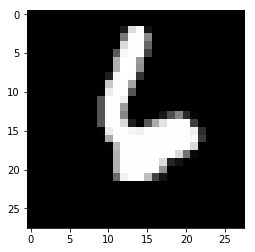

In [72]:
plt.imshow(X_train.iloc[26].values.reshape(28,28),cmap='gist_gray')
plt.show()


In [73]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)

In [74]:
x = tf.placeholder(tf.float32,shape=[None,784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x,W) + b 

In [75]:
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [76]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))

In [77]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [78]:
train = optimizer.minimize(cross_entropy)

In [82]:
init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)

In [83]:
#X_train = Dataset(train.iloc[0:37000])

In [85]:

    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
for step in range(1000):
        
        #batch_x , batch_y = train.next_batch(100)
        
    session.run(train,feed_dict={x:X_train,y_true:y_train})
        
    # Test the Train Model
    #matches = tf.equal(tf.argmax(y,1),tf.argmax(y_test,1))
pred = tf.argmax(y,1)
    #print ("predictions", pred.eval(feed_dict={x: X_test}, session=sess))

    
    #acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    #print(sess.run(acc,feed_dict={x:X_test,y_true:y_test}))

In [46]:
X_train.shape

(42000, 784)

In [50]:
y_train.shape

(42000, 10)

In [48]:
X_test.shape

(28000, 784)

In [64]:
#print prediction.eval(feed_dict={x: X_test})
print ("predictions", pred.eval(feed_dict={x: X_test}, session=sess))


ValueError: Cannot evaluate tensor using `eval()`: No default session is registered. Use `with sess.as_default()` or pass an explicit session to `eval(session=sess)`

In [89]:
submissions=pd.DataFrame({"ImageId":range(1,28001),"Label": pred.eval(feed_dict={x: X_test}, session=session)})
submissions.to_csv("DR1.csv", index=False, header=True)